In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import os

In [4]:
df = pd.read_csv("../data/noticias_limpias.csv")

In [5]:
print(df.columns)

Index(['titulo', 'bajada', 'cuerpo', 'nombre_medio', 'tipo_medio', 'fecha',
       'seccion', 'texto', 'largo_texto', 'anio_mes'],
      dtype='object')


In [19]:
stopwords = set(STOPWORDS)
stopwords.update([
    "dijo", "años", "año", "mil", "ser", "estar", "tener", "haber",
    "así", "también", "puede", "cada", "nuevo", "tras", "entre",
    "luego", "aunque", "porque", "mientras", "cuando", "más",
    "pero", "uno", "dos", "tres", "además", "aún", "ya", "sin",
    "antes", "después", "sobre", "durante", "según", "hoy", "ayer",
    "en", "la", "de", "cve", "spa", "y","lo","su","como","que","con",
    "por", "los", "las","e", "o", "es", "para", "el","se","todo","desde",
    "una","un","este","eso", "esto","esta", "al", "del", "se", "fue", "solo",
    "sino","son", "ha", "sea", "ella","cual", "sus"
])

In [20]:
def generar_wordcloud(texto, titulo="Nube de Palabras"):
    wc = WordCloud(
        width=1600, height=800,
        background_color="white",
        stopwords=stopwords,
        max_words=300
    ).generate(texto)

    plt.figure(figsize=(20, 10))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(titulo, fontsize=20)
    plt.show()

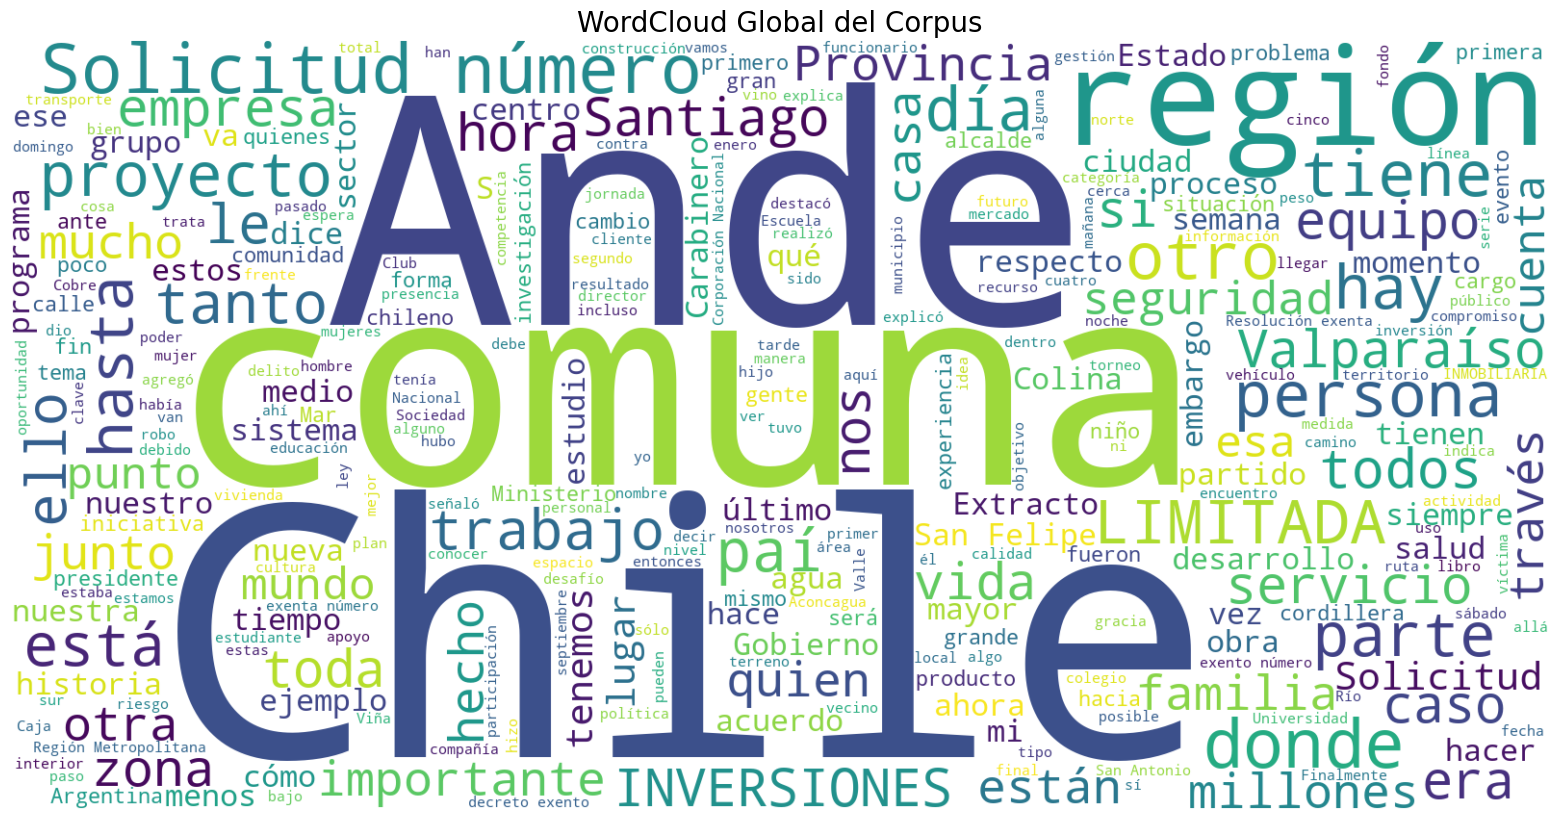

In [21]:
texto_completo = " ".join(df["texto"].dropna())
generar_wordcloud(texto_completo, "WordCloud Global del Corpus")

In [9]:
def asegurarse_directorio(path):
    os.makedirs(path, exist_ok=True)

In [10]:
def generar_wordcloud(texto, titulo, path):
    wc = WordCloud(
        width=1600, height=800,
        background_color="white",
        stopwords=stopwords,
        max_words=300
    ).generate(texto)

    plt.figure(figsize=(20, 10))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(titulo, fontsize=20)
    plt.savefig(path, bbox_inches='tight')
    plt.close()

In [11]:
df["tipo_medio"] = df["tipo_medio"].fillna("Desconocido")
df["seccion"] = df["seccion"].fillna("General")

for tipo in df["tipo_medio"].unique():
    df_tipo = df[df["tipo_medio"] == tipo]

    for seccion in df_tipo["seccion"].unique():
        df_sec = df_tipo[df_tipo["seccion"] == seccion]

        for medio in df_sec["nombre_medio"].unique():
            df_medio = df_sec[df_sec["nombre_medio"] == medio]

            if len(df_medio) < 20:
                continue

            texto = " ".join(df_medio["texto"].dropna())

            if texto.strip():
                safe_tipo = str(tipo).replace(" ", "_")
                safe_seccion = str(seccion).replace(" ", "_")
                safe_medio = str(medio).replace(" ", "_")

                ruta_directorio = f"../output/wordclouds/{safe_tipo}/{safe_seccion}"
                asegurarse_directorio(ruta_directorio)

                ruta_imagen = f"{ruta_directorio}/{safe_medio}.png"

                generar_wordcloud(
                    texto,
                    f"{medio} [{seccion} - {tipo}]",
                    path=ruta_imagen
                )
                print(f"Guardado: {ruta_imagen}")
            else:
                print(f"Sin texto: {medio} - {seccion} - {tipo}")

Guardado: ../output/wordclouds/0/Deportes/El_Sur_Concepcion.png
Guardado: ../output/wordclouds/0/Deportes/La_Tribuna.png
Guardado: ../output/wordclouds/0/Deportes/El_Rancagüino.png
Guardado: ../output/wordclouds/0/Deportes/Las_Últimas_Noticias.png
Guardado: ../output/wordclouds/0/Deportes/Diario_Austral_Region_de_los_Rios.png
Guardado: ../output/wordclouds/0/Actualidad/El_Llanquihue.png
Guardado: ../output/wordclouds/0/Actualidad/HoyxHoy_Antofagasta.png
Guardado: ../output/wordclouds/0/Actualidad/El_Líder_San_Antonio.png
Guardado: ../output/wordclouds/0/Actualidad/El_Mercurio_de_Valparaiso.png
Guardado: ../output/wordclouds/0/Actualidad/La_Estrella_de_Valparaiso.png
Guardado: ../output/wordclouds/0/Actualidad/HoyxHoy.png
Guardado: ../output/wordclouds/0/Actualidad/La_Estrella_El_Diario_de_Chiloe.png
Guardado: ../output/wordclouds/0/Actualidad/El_Observador_Quillota_-_Aconcagua.png
Guardado: ../output/wordclouds/0/Actualidad/El_Lider_San_Antonio.png
Guardado: ../output/wordclouds/0/Actu